In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

top5_conferences_google = ['neural information processing systems',
                     'international conference on learning representations',
                     'international conference on machine learning',
                     'national conference on artificial intelligence',
                     'international joint conference on artificial intelligence']


In [3]:
# Defining fontsizes for figures

tick_fontsize = 10
label_fontsize = 12
title_fontsize = 12
legend_fontsize = 10

In [4]:
df_concatenated = pd.read_csv("data/figure4_data.csv")

## Percentage difference in the number of papers published in top conferences between US+China collaboration vs. not US+China

Logic here is:

1. Percentage of US-China collaboration papers that are published in top conferences 
2. Percentage of not US-China collaboration papers that are published in top conferences

In [5]:
df_concatenated_top = df_concatenated[df_concatenated.Venue.isin(top5_conferences_google)]

df_concatenated_top.head(5)

,PID,PubYear,us_china_collab,JID,CSID,JournalNameNorm,ConferenceNameNorm,Venue,analysis_type,CollaborationType
106,62217316,2013,1,NaN,1.184914e+09,NaN,National Conference on Artificial Intelligence,national conference on artificial intelligence,china_us,China-US
128,77289000,2013,1,NaN,1.204000e+09,NaN,International Joint Conference on Artificial I...,international joint conference on artificial i...,china_us,China-US
132,79405465,2010,1,NaN,1.180663e+09,NaN,International Conference on Machine Learning,international conference on machine learning,china_us,China-US
144,89212421,2011,1,NaN,1.184914e+09,NaN,National Conference on Artificial Intelligence,national conference on artificial intelligence,china_us,China-US
148,93018862,2011,1,NaN,1.204000e+09,NaN,International Joint Conference on Artificial I...,international joint conference on artificial i...,china_us,China-US


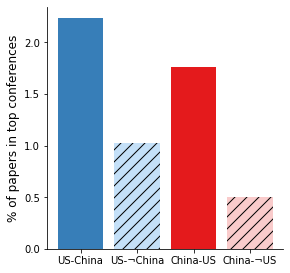

In [6]:
# Calculate the figure size in inches
fig_width = 8.27 * (1/2)  # A4 width is 8.27 inches
fig_height = 11.69 * (1/3)  # A4 height is 11.69 inches

# Create a bar plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


# Create the bars
ax.bar(0, 
       (df_concatenated_top.groupby(['us_china_collab','analysis_type'])\
        ['PID'].nunique()*100/df_concatenated.groupby(['us_china_collab','analysis_type'])['PID'].nunique())[1]['us_china'], 
       color='#377eb8', 
       label='US-China')

ax.bar(1, 
       (df_concatenated_top.groupby(['us_china_collab','analysis_type'])\
        ['PID'].nunique()*100/df_concatenated.groupby(['us_china_collab','analysis_type'])['PID'].nunique())[0]['us_china'], 
       color='#8ac3f2', 
       label='US-notChina', hatch='//', alpha=0.5)

ax.bar(2, 
       (df_concatenated_top.groupby(['us_china_collab','analysis_type'])\
        ['PID'].nunique()*100/df_concatenated.groupby(['us_china_collab','analysis_type'])['PID'].nunique())[1]['china_us'], 
       color='#e41a1c', 
       label='China-US')

ax.bar(3, 
       (df_concatenated_top.groupby(['us_china_collab','analysis_type'])\
        ['PID'].nunique()*100/df_concatenated.groupby(['us_china_collab','analysis_type'])['PID'].nunique())[0]['china_us'], 
       color='#f59899', 
       label='China-notUS', hatch='//', alpha=0.5)

# Set the x-axis ticks and labels
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['US-China', 'US-¬China', 'China-US', 'China-¬US'], fontsize=tick_fontsize)
ax.set_ylabel('% of papers in top conferences', fontsize=label_fontsize)  # Y-axis label

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

plt.show()

In [7]:
# Let's map each conference to an abbreviation

venue_to_abbr = {'international joint conference on neural network':'IJCNN',
                             'international conference on learning representations':'ICLR',
                             'international conference on artificial intelligence and statistics':'AISTATS',
                             'the journal of machine learning research': 'JMLR',
                             'national conference on artificial intelligence': 'AAAI',
                             'neural information processing systems': 'NeurIPS',
                             'conference on learning theory': 'CLT',
                             'international conference on machine learning': 'ICML',
                             'robotics and autonomous systems':'Robotics and Autonomous Systems',
                             'international joint conference on artificial intelligence': 'IJCAI',
                             'expert systems with applications': 'Expert Systems with Applications',
                             'engineering applications of artificial intelligence':'Engineering Applications of Artificial Intelligence',
                             'ieee transactions on systems man and cybernetics':'IEEE Transactions on Systems, Man, and Cybernetics',
                             'neural networks':'Neural Networks',
                             'ieee transactions on neural networks': 'IEEE Transactions on Neural Networks',
                             'ieee transactions on fuzzy systems': 'IEEE Transactions on Fuzzy Systems',
                             'applied soft computing': 'Applied Soft Computing',
                             'knowledge based systems': 'Knowledge-Based Systems',
                             'neural computing and applications':'Neural Computing and Applications',
                             'neurocomputing': 'Neurocomputing'}



## Compare: (i) US-China, (ii) US not China, (iii) China-US, (iv) China not US

In [8]:
# Let us compute (a)

dfa = df_concatenated.groupby(['Venue', 'CollaborationType'])['PID'].nunique().reset_index()\
                    .rename(columns={'PID':'NumPapers'})

dfb = df_concatenated.groupby(['CollaborationType'])['PID'].nunique().reset_index()\
                    .rename(columns={'PID':'TotalPapers'})

dfc = dfa.merge(dfb, on=['CollaborationType'])

dfc['share'] = dfc['NumPapers']*100/dfc['TotalPapers']



# Now let us extract only data relevant for version 1
df_relevant_v2 = dfc[dfc.Venue.isin(top5_conferences_google)]\
                        .sort_values(by=['Venue'])

# Now we need to impute

grouped = df_relevant_v2.groupby(['Venue'])

required_groups = ['US-notChina', 'US-China', 'China-US', 'China-notUS']

def add_flipped_rows(group):
    if 'China-notUS' in group['CollaborationType'].values and 'China-US' in group['CollaborationType'].values and \
       'US-notChina' in group['CollaborationType'].values and 'US-China' in group['CollaborationType'].values:
        return group
    else:
        missing_groups = set(required_groups) - set(group['CollaborationType'].values)
        lst_dfs_groups = []
        
        for g in missing_groups:
            flipped_group = group.copy()
            flipped_group['CollaborationType'] = g
            flipped_group['share'] = 0
            flipped_group['NumPapers'] = 0
            lst_dfs_groups.append(flipped_group)
        
        return pd.concat([group]+lst_dfs_groups, ignore_index=True)

result_df = grouped.apply(add_flipped_rows).reset_index(drop=True)

df = result_df.copy().sort_values(by=['Venue','CollaborationType'])
# Mapping venues to abbreviations

df['Venue'] = df['Venue'].replace(venue_to_abbr)



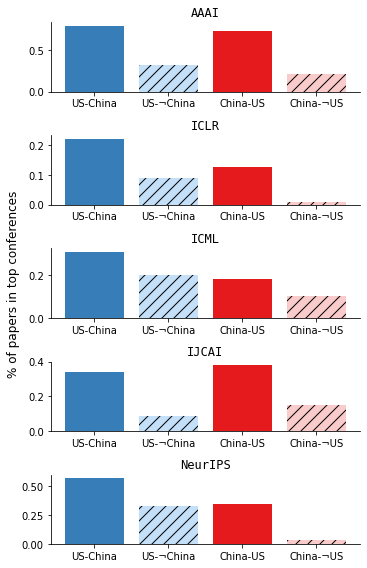

In [9]:
# Sort the dataframe by venue for better arrangement
df = df.sort_values(by=['Venue'])

# Create a figure with 10 subplots
fig, axs = plt.subplots(5, 1, figsize=(5, 8))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define the font family for titles
title_font = {'fontname':'Helvetica'}  # Change 'Arial' to the desired font family

# Iterate over venues and create bar plots
for i, (venue, ax) in enumerate(zip(df['Venue'].unique(), axs)):
    venue_data = df[df['Venue'] == venue]
    us_china = venue_data[venue_data['CollaborationType']=='US-China']
    us_notchina = venue_data[venue_data['CollaborationType']=='US-notChina']

    china_us = venue_data[venue_data['CollaborationType']=='China-US']
    china_notus = venue_data[venue_data['CollaborationType']=='China-notUS']
    #f59899 #8ac3f2
    ax.bar(0, us_china['share'], color="#377eb8", label='US-China')
    ax.bar(1, us_notchina['share'], color="#8ac3f2", label='US-¬China',hatch='//',alpha=0.5)
    ax.bar(2, china_us['share'], color="#e41a1c", label='China-US')
    ax.bar(3, china_notus['share'], color="#f59899", label='China-¬US',hatch='//',alpha=0.5)
    
    if len(venue.split()) > 3:
        venue_parts = venue.split()
        venue = '\n'.join([ ' '.join(venue_parts[:len(venue_parts)//2]), ' '.join(venue_parts[len(venue_parts)//2:]) ])

    ax.set_title(venue, fontsize=title_fontsize, fontname = 'monospace')
    ax.set_xticks([0, 1, 2 ,3])
    ax.set_xticklabels(['US-China', 'US-¬China', 'China-US', 'China-¬US'], fontsize=tick_fontsize)
    #ax.set_ylim(0, 1)  # Adjust the y-axis limits as needed
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add shared y-axis label
fig.text(-0.01, 0.5, '% of papers in top conferences', va='center', rotation='vertical', fontsize=label_fontsize)  # Adjust position and fontsize as needed

# Adjust layout
plt.tight_layout()

plt.show()

## Compare: (i) US-China, (ii) US not China, (iii) China-US, (iv) China not US across time

In [10]:

# Let us compute (a)

dfa = df_concatenated[df_concatenated.Venue.isin(top5_conferences_google)].groupby(['PubYear','CollaborationType'])\
                    ['PID'].nunique().reset_index()\
                    .rename(columns={'PID':'NumPapers'})

# dfa = df_concatenated.groupby(['PubYear', 'us_china_collab'])['PID'].nunique().reset_index()\
#                     .rename(columns={'PID':'NumPapers'})

dfa.shape, dfa.head()

((74, 3),
    PubYear CollaborationType  NumPapers
 0     2000       US-notChina        112
 1     2001       China-notUS          1
 2     2001       US-notChina        124
 3     2002       US-notChina        141
 4     2003          China-US          1)

In [11]:
# Let us compute (b)

dfb = df_concatenated.groupby(['PubYear','CollaborationType'])\
                    ['PID'].nunique().reset_index()\
                    .rename(columns={'PID':'TotalPapers'})

dfb.shape, dfb.head()

((268, 3),
    PubYear CollaborationType  TotalPapers
 0     1800       US-notChina            2
 1     1870       US-notChina            2
 2     1899       US-notChina          104
 3     1901       US-notChina            3
 4     1902       US-notChina            3)

In [12]:
# Now we merge a and b

dfc = dfa.merge(dfb, on=['CollaborationType','PubYear'], how='left')

dfc.shape, dfc

((74, 4),
     PubYear CollaborationType  NumPapers  TotalPapers
 0      2000       US-notChina        112        18875
 1      2001       China-notUS          1         1533
 2      2001       US-notChina        124        19845
 3      2002       US-notChina        141        23873
 4      2003          China-US          1          111
 ..      ...               ...        ...          ...
 69     2019       US-notChina       1390        70486
 70     2020          China-US        164         5068
 71     2020       China-notUS        893        70807
 72     2020          US-China        255         6346
 73     2020       US-notChina       2106        75168
 
 [74 rows x 4 columns])

In [13]:
# Now let us compute the share

dfc['share'] = dfc['NumPapers']*100/dfc['TotalPapers']

dfc.head(20)

,PubYear,CollaborationType,NumPapers,TotalPapers,share
0,2000,US-notChina,112,18875,0.593377
1,2001,China-notUS,1,1533,0.065232
2,2001,US-notChina,124,19845,0.624843
3,2002,US-notChina,141,23873,0.590625
4,2003,China-US,1,111,0.900901
5,2003,China-notUS,1,3533,0.028305
6,2003,US-China,1,181,0.552486
7,2003,US-notChina,225,27128,0.829401
8,2004,China-notUS,2,5649,0.035404
9,2004,US-China,1,272,0.367647


In [14]:
# Now let us extract only data relevant for version 1
df_relevant_v1 = dfc.sort_values(by=['PubYear'])

df_relevant_v1

,PubYear,CollaborationType,NumPapers,TotalPapers,share
0,2000,US-notChina,112,18875,0.593377
1,2001,China-notUS,1,1533,0.065232
2,2001,US-notChina,124,19845,0.624843
3,2002,US-notChina,141,23873,0.590625
4,2003,China-US,1,111,0.900901
...,...,...,...,...,...
68,2019,US-China,186,5579,3.333931
71,2020,China-notUS,893,70807,1.261175
72,2020,US-China,255,6346,4.018279
70,2020,China-US,164,5068,3.235991


In [15]:
# Now we need to impute


grouped = df_relevant_v1.groupby(['PubYear'])

required_groups = ['US-notChina', 'US-China', 'China-US', 'China-notUS']

def add_flipped_rows(group):
    if 'China-notUS' in group['CollaborationType'].values and 'China-US' in group['CollaborationType'].values and \
       'US-notChina' in group['CollaborationType'].values and 'US-China' in group['CollaborationType'].values:
        return group
    else:
        missing_groups = set(required_groups) - set(group['CollaborationType'].values)
        lst_dfs_groups = []
        
        for g in missing_groups:
            flipped_group = group.copy()
            flipped_group['CollaborationType'] = g
            flipped_group['share'] = 0
            flipped_group['NumPapers'] = 0
            lst_dfs_groups.append(flipped_group)
        
        return pd.concat([group]+lst_dfs_groups, ignore_index=True)

result_df = grouped.apply(add_flipped_rows).reset_index(drop=True)

df = result_df.copy().sort_values(by=['PubYear','CollaborationType'])

df = df[df.PubYear.le(2020)]


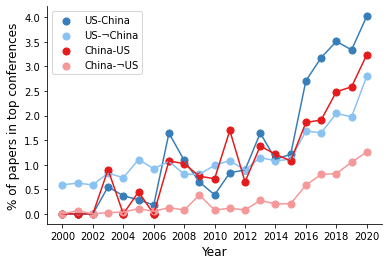

In [16]:

# Create a figure and axis
fig, ax = plt.subplots()

# Create scatter plots
scatter1 = ax.scatter(df[df.CollaborationType=='US-China'].PubYear, 
                      df[df.CollaborationType=='US-China'].share, s=50, color="#377eb8", 
            label="US-China")
scatter2 = ax.scatter(df[df.CollaborationType=='US-notChina'].PubYear, 
                      df[df.CollaborationType=='US-notChina'].share, s=50, color="#8ac3f2", 
            label="US-¬China")

scatter3 = ax.scatter(df[df.CollaborationType=='China-US'].PubYear, 
                      df[df.CollaborationType=='China-US'].share, s=50, color="#e41a1c", 
            label="China-US")
scatter4 = ax.scatter(df[df.CollaborationType=='China-notUS'].PubYear, 
                      df[df.CollaborationType=='China-notUS'].share, s=50, color="#f59899", 
            label="China-¬US")


# Connect the scatter plots with a line
line1 = ax.plot(df[df.CollaborationType=='US-China'].PubYear.values, 
                df[df.CollaborationType=='US-China'].share.values, color='#377eb8')

line2 = ax.plot(df[df.CollaborationType=='US-notChina'].PubYear.values, 
                df[df.CollaborationType=='US-notChina'].share.values, color='#8ac3f2')


line3 = ax.plot(df[df.CollaborationType=='China-US'].PubYear.values, 
                df[df.CollaborationType=='China-US'].share.values, color='#e41a1c')

line4 = ax.plot(df[df.CollaborationType=='China-notUS'].PubYear.values, 
                df[df.CollaborationType=='China-notUS'].share.values, color='#f59899')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels and title
ax.set_xlabel('Year', fontsize=label_fontsize)
ax.set_ylabel('% of papers in top conferences', fontsize=label_fontsize)

# Set custom x-axis ticks and labels
xticks = range(2000,2021,2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=tick_fontsize)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fancybox=True)


# Show the plot
# Show or save the plot
plt.show()